In [423]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV,cross_val_score

# import the functions for visualizing the decision tree

# import pydotplus   
from IPython.display import Image  

import random

# import function to perform feature selection
from sklearn.feature_selection import RFE
%matplotlib inline
pd.set_option('display.max_columns', None)

from scipy import stats

In [3]:
plt.rcParams['figure.facecolor']='beige'

# DATA  DICTIONARY

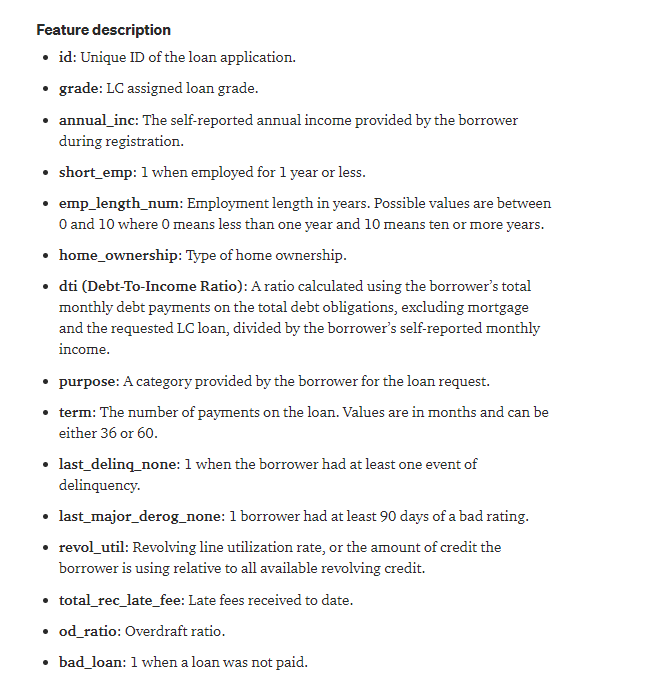

In [4]:
df = pd.read_csv("lending_club_loan_dataset.csv")
df.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000,1,1,RENT,26.270000,credit_card,36 months,1,NaN,43.200000,0.000000,0.160624,0
1,9604874,A,83000,0,4,OWN,5.390000,credit_card,36 months,0,NaN,21.500000,0.000000,0.810777,0
2,9684700,D,78000,0,11,MORTGAGE,18.450000,debt_consolidation,60 months,1,NaN,46.300000,0.000000,0.035147,1
3,9695736,D,37536,0,6,MORTGAGE,12.280000,medical,60 months,0,NaN,10.700000,0.000000,0.534887,1
4,9795013,D,65000,0,11,MORTGAGE,11.260000,debt_consolidation,36 months,0,NaN,15.200000,0.000000,0.166500,0


# DATA PREPROCESSING / DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  int64  
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

In [6]:
df.isnull().sum()/df.shape[0]*100

id                       0.000000
grade                    0.000000
annual_inc               0.000000
short_emp                0.000000
emp_length_num           0.000000
home_ownership           7.455000
dti                      0.770000
purpose                  0.000000
term                     0.000000
last_delinq_none         0.000000
last_major_derog_none   97.130000
revol_util               0.000000
total_rec_late_fee       0.000000
od_ratio                 0.000000
bad_loan                 0.000000
dtype: float64

In [7]:
df["home_ownership"].value_counts()

MORTGAGE    9844
RENT        7052
OWN         1613
Name: home_ownership, dtype: int64

In [8]:
df["home_ownership"].value_counts(normalize=True)*100

MORTGAGE   53.184937
RENT       38.100384
OWN         8.714679
Name: home_ownership, dtype: float64

In [9]:
#imputing null values through mode imputations.

df["home_ownership"].fillna(value="MISSING",inplace=True)

In [10]:
df["home_ownership"].isnull().sum()

0

In [11]:
df["home_ownership"].value_counts(normalize=True)

MORTGAGE   0.492200
RENT       0.352600
OWN        0.080650
MISSING    0.074550
Name: home_ownership, dtype: float64

In [12]:
#dropping the last_major_derog_none column as it has more than 97% of missing values.

df.drop("last_major_derog_none",axis=1,inplace=True)

In [13]:
df["dti"].describe()

count   19846.000000
mean       16.587841
std         7.585812
min         0.000000
25%        10.852500
50%        16.190000
75%        22.060000
max        34.990000
Name: dti, dtype: float64

In [14]:
df.groupby("grade")["dti"].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,2147.000000,14.306134,7.419140,0.000000,8.560000,13.680000,19.615000,34.980000
B,5992.000000,15.979710,7.375652,0.000000,10.370000,15.505000,21.152500,34.810000
C,5521.000000,17.008524,7.523748,0.000000,11.310000,16.670000,22.460000,34.990000
D,3532.000000,17.417307,7.651217,0.000000,11.750000,17.025000,22.925000,34.970000
E,1632.000000,17.794602,7.746204,0.000000,11.990000,17.640000,23.422500,34.990000
F,855.000000,17.904690,7.635113,0.000000,12.125000,17.980000,23.230000,34.570000
G,167.000000,17.756407,7.846354,0.000000,11.995000,17.250000,23.425000,34.820000


In [15]:
frames = []
for i in list(set(df['grade'])):
    df_final = df[df['grade']== i]
    df_final['dti'].fillna(df_final['dti'].median(),inplace = True)
    frames.append(df_final)
    final_df = pd.concat(frames)

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19992
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   grade               20000 non-null  object 
 2   annual_inc          20000 non-null  int64  
 3   short_emp           20000 non-null  int64  
 4   emp_length_num      20000 non-null  int64  
 5   home_ownership      20000 non-null  object 
 6   dti                 20000 non-null  float64
 7   purpose             20000 non-null  object 
 8   term                20000 non-null  object 
 9   last_delinq_none    20000 non-null  int64  
 10  revol_util          20000 non-null  float64
 11  total_rec_late_fee  20000 non-null  float64
 12  od_ratio            20000 non-null  float64
 13  bad_loan            20000 non-null  int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 2.3+ MB


In [17]:
df["dti"].update(final_df["dti"])

In [18]:
df.isnull().sum()

id                    0
grade                 0
annual_inc            0
short_emp             0
emp_length_num        0
home_ownership        0
dti                   0
purpose               0
term                  0
last_delinq_none      0
revol_util            0
total_rec_late_fee    0
od_ratio              0
bad_loan              0
dtype: int64

In [19]:
df["term"].unique()

array(['36 months', '60 months', '36 Months'], dtype=object)

In [20]:
df["term"].replace({"36 Months" :"36 months"},inplace=True)
df["term"].value_counts()

36 months    15001
60 months     4999
Name: term, dtype: int64

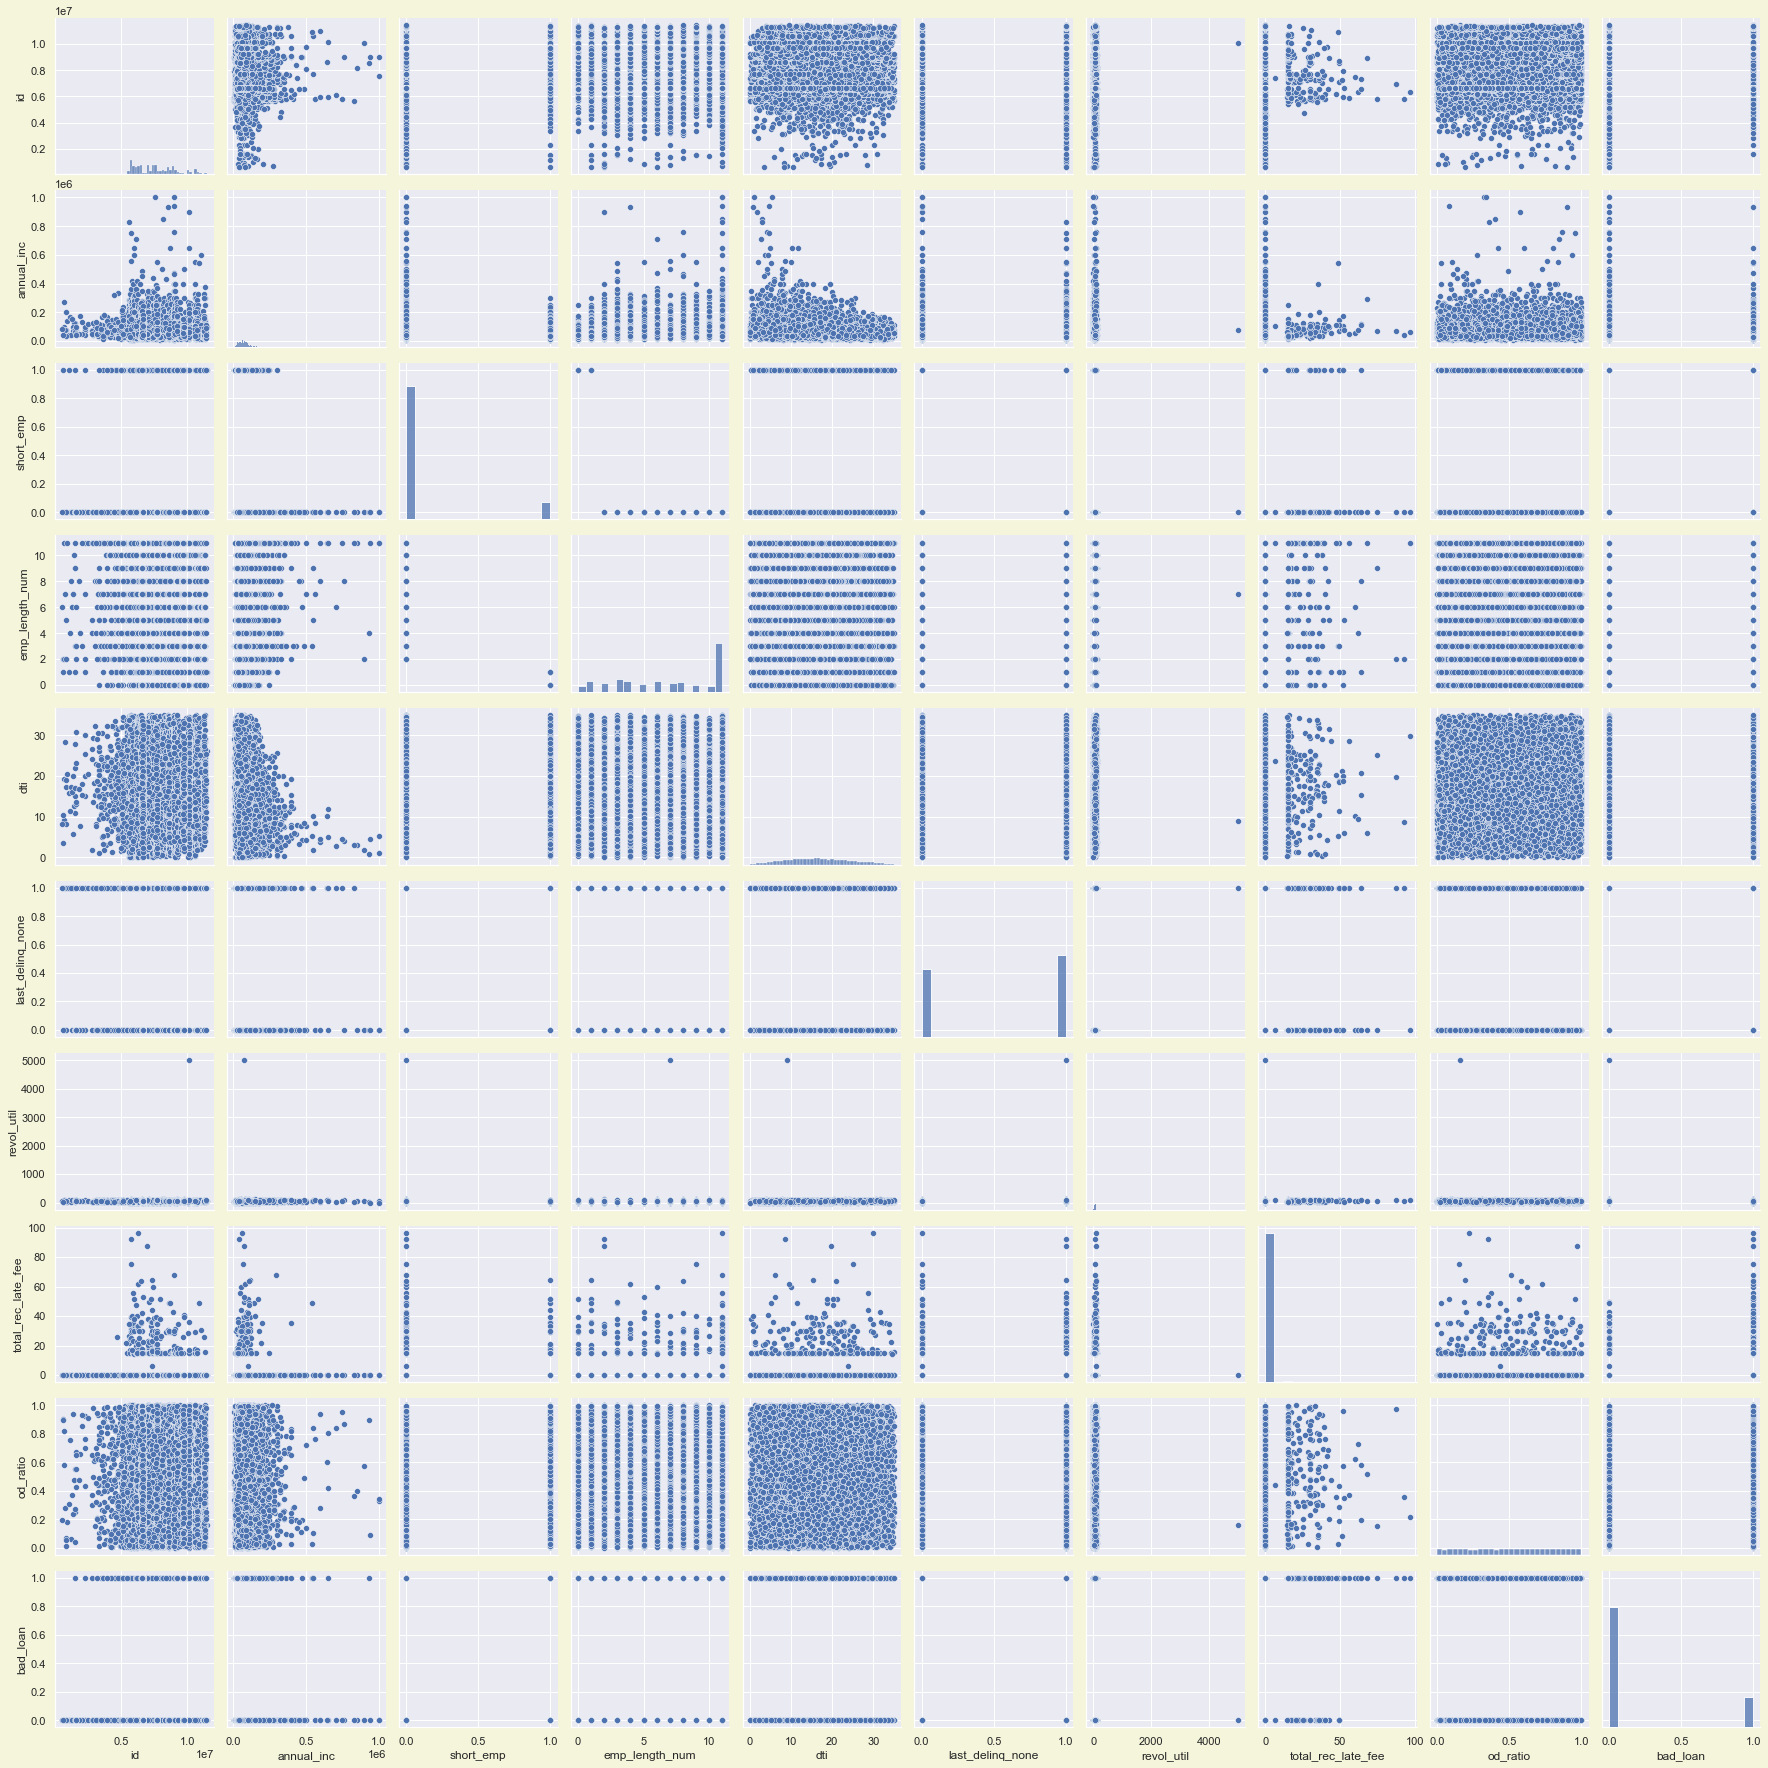

In [21]:
sns.pairplot(df)
plt.show()

### Numerical attributes 

In [22]:
df_num = df.select_dtypes(np.number)
df_num.head()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,100000,1,1,26.270000,1,43.200000,0.000000,0.160624,0
1,9604874,83000,0,4,5.390000,0,21.500000,0.000000,0.810777,0
2,9684700,78000,0,11,18.450000,1,46.300000,0.000000,0.035147,1
3,9695736,37536,0,6,12.280000,0,10.700000,0.000000,0.534887,1
4,9795013,65000,0,11,11.260000,0,15.200000,0.000000,0.166500,0


In [23]:
#CHECKING THE COR-RELATION BETWEEN THE NUMERICAL VARIABLES USING HEAT MAP.

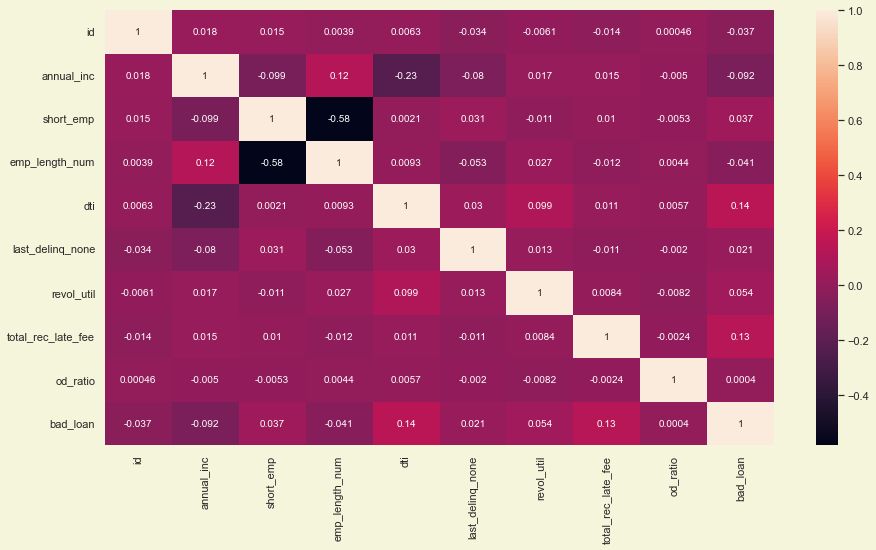

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [25]:
#FFROM THE CO-RELATION MATRIX WE CAN CLEARLY SEE THAT NONE OF THE NUMERICAL VARIABLES ARE
#INFLUENCING THE TARGET VARIABLE.

#WE CAN SEE A MULTI COLLINEARITY IN EMP - LENGTH VARIABLE AND SHORT EMP VARIABLE, SO WE CAN DROP SHORT EMP
#AS THE EMP - LENGTH VARIABLE HAS THE INFORMATION ABOUT SHORT EMP, AND SHORT EMP VARIABLE IS REDUNDANT. 

In [26]:
#dropping the short emp variable.

df.drop("short_emp", axis=1,inplace=True)

In [27]:
df_num.drop("short_emp", axis=1,inplace=True)

In [28]:
#CHECKING OUTLIERS USING BOXPLOT

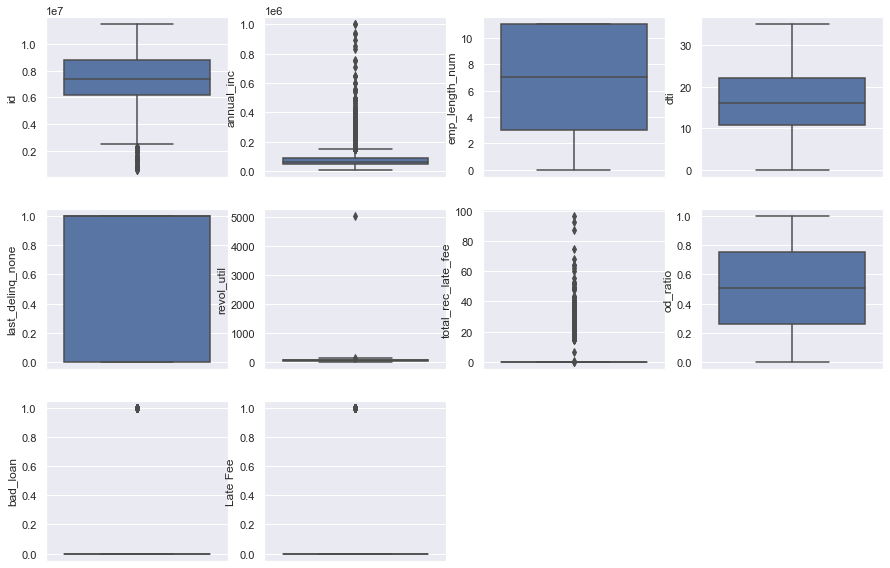

In [424]:
plt.subplots(figsize=(15,10)) 
for i,c in enumerate(df_num,1):
    plt.subplot(3,4,i)
    sns.boxplot(y = df_num[c])

In [30]:
#CHECKING THE KDE USING DISTPLOT.

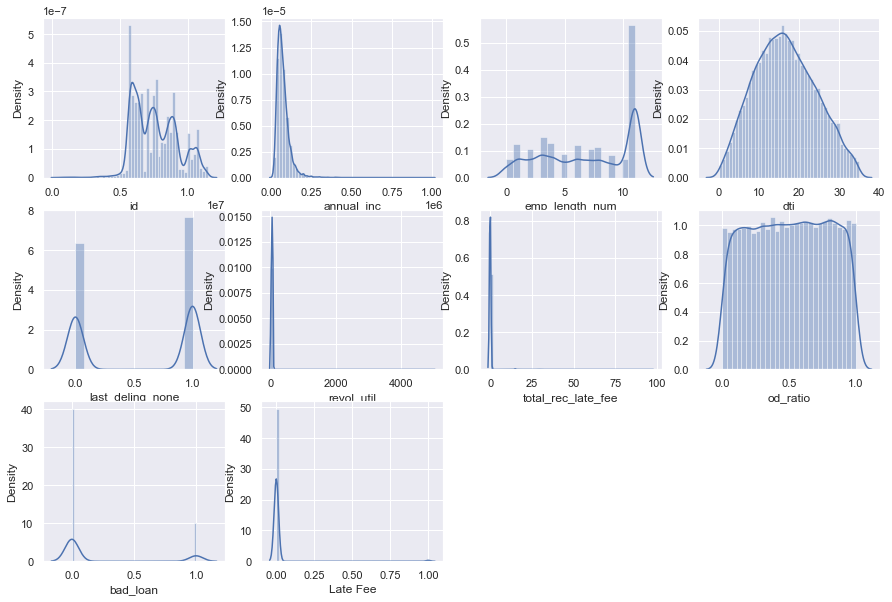

In [427]:
plt.subplots(figsize=(15,10))
for i,c in enumerate(df_num,1):
    plt.subplot(3,4,i)
    sns.distplot( df_num[c])

### Categorical attributes 

In [32]:
df_cat = df.select_dtypes(include="object")
df_cat.head()

,grade,home_ownership,purpose,term
0,A,RENT,credit_card,36 months
1,A,OWN,credit_card,36 months
2,D,MORTGAGE,debt_consolidation,60 months
3,D,MORTGAGE,medical,60 months
4,D,MORTGAGE,debt_consolidation,36 months


In [33]:
df_cat["grade"].value_counts()

B    6042
C    5566
D    3554
A    2159
E    1645
F     865
G     169
Name: grade, dtype: int64

In [34]:
df_cat["home_ownership"].value_counts()

MORTGAGE    9844
RENT        7052
OWN         1613
MISSING     1491
Name: home_ownership, dtype: int64

In [35]:
df_cat["purpose"].value_counts()

debt_consolidation    12337
credit_card            4137
home_improvement       1096
other                  1021
major_purchase          379
small_business          265
medical                 175
car                     168
moving                  123
vacation                112
house                   101
wedding                  86
Name: purpose, dtype: int64

In [36]:
df_cat["term"].value_counts()

36 months    15001
60 months     4999
Name: term, dtype: int64

## Statistical Tests for significance of Categorical variables

In [37]:
for i in df_cat.columns:
    print(i)
    print(stats.chi2_contingency(pd.crosstab(df[i],df['bad_loan'])))
    print('\n')

grade
(1043.4871531168008, 3.5090756882127464e-222, 6, array([[1727.2,  431.8],
       [4833.6, 1208.4],
       [4452.8, 1113.2],
       [2843.2,  710.8],
       [1316. ,  329. ],
       [ 692. ,  173. ],
       [ 135.2,   33.8]]))


home_ownership
(109.8577221305552, 1.1774832272384763e-23, 3, array([[1192.8,  298.2],
       [7875.2, 1968.8],
       [1290.4,  322.6],
       [5641.6, 1410.4]]))


purpose
(90.05655223878915, 1.625153100822036e-14, 11, array([[ 134.4,   33.6],
       [3309.6,  827.4],
       [9869.6, 2467.4],
       [ 876.8,  219.2],
       [  80.8,   20.2],
       [ 303.2,   75.8],
       [ 140. ,   35. ],
       [  98.4,   24.6],
       [ 816.8,  204.2],
       [ 212. ,   53. ],
       [  89.6,   22.4],
       [  68.8,   17.2]]))


term
(353.7879931162554, 6.342535835617436e-79, 1, array([[12000.8,  3000.2],
       [ 3999.2,   999.8]]))




* We can clearly see that the pvalues of all the categorical variables are below 0.05.
* This implies we reject the null hypothesis and can conclude the catergorical variables and target are dependent.
* We shall conclude that the categorical variables are significant.

# UNI-VARIATE ANALYSIS

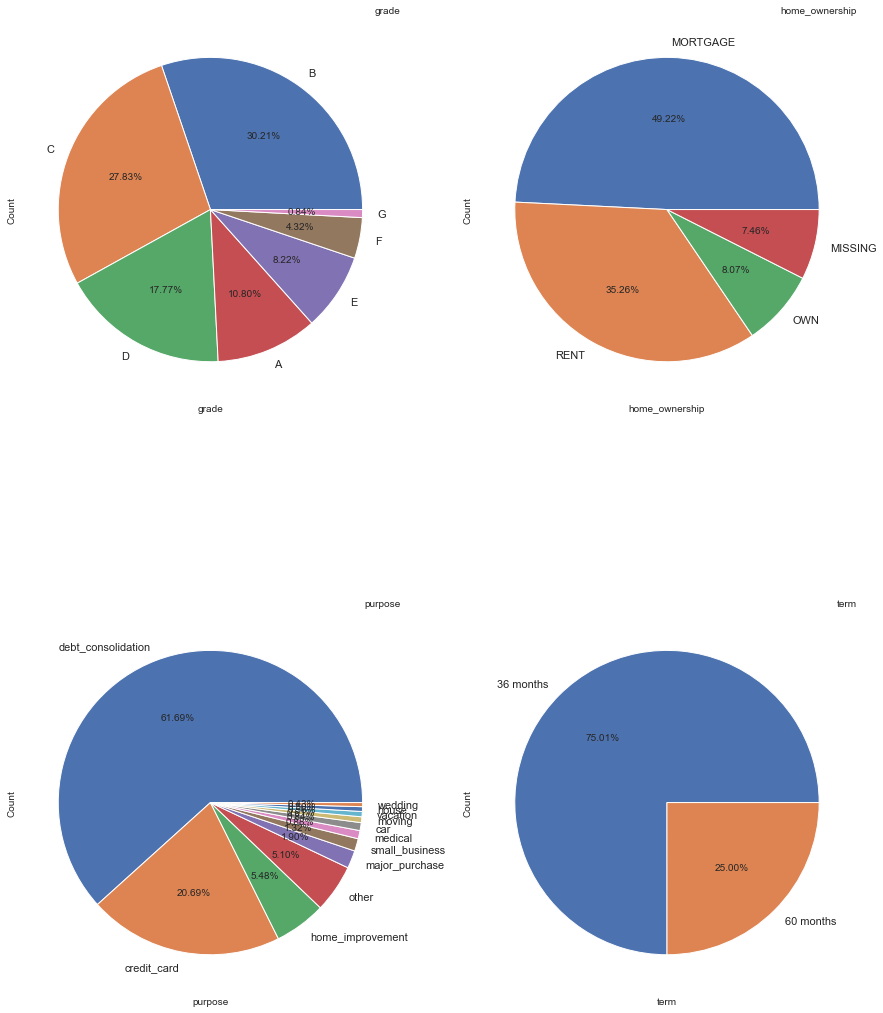

In [428]:
c=1
plt.figure(figsize=(15,20))
for col in df_cat.columns:
    plt.subplot(2,2,c)
    plt.pie(df_cat[col].value_counts(),autopct='%.2f%%', colors=sns.color_palette(),labels=df_cat[col].value_counts().index)
    
    plt.xlabel(col, fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="right")
    c=c+1

In [39]:
#FROM THE GRAPHS WE COULD SEE THAT,

# B and C are the highest contributer for the loan given in grade and lowest are F and G.

# from the home ownersip feature, most of the loan are availed by MORTGAGE category & the least is OWN house category.

# from the purpose feature,most of the loan are availed by debt consolidation and credit car & the lowest are
# house, wedding and vacation.

#from the term feature we could see that 36 month tenure is usually preferred by loan availers than 60 months tenure.


# BI-VARIENT / MULTI-VARIENT ANALYSIS

In [40]:
grad = pd.crosstab(df["bad_loan"],df["grade"],normalize="index")*100
grad

grade,A,B,C,D,E,F,G
bad_loan,,,,,,,
0,12.718750,32.968750,27.462500,16.093750,6.893750,3.212500,0.650000
1,3.100000,19.175000,29.300000,24.475000,13.550000,8.775000,1.625000


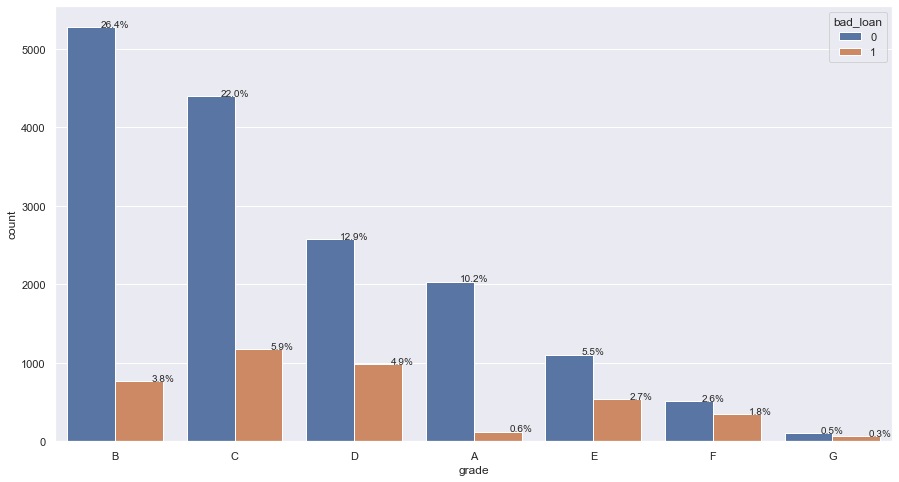

In [429]:
plt.figure(figsize=(15,8))
total = float(len(df))
ax = sns.countplot(x="grade", hue="bad_loan", data=df,order=df["grade"].value_counts().index)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [42]:
#we can see that, B and C are the highest loan availers as well as they have a very low number of 
#defaulters when compared with other grades.

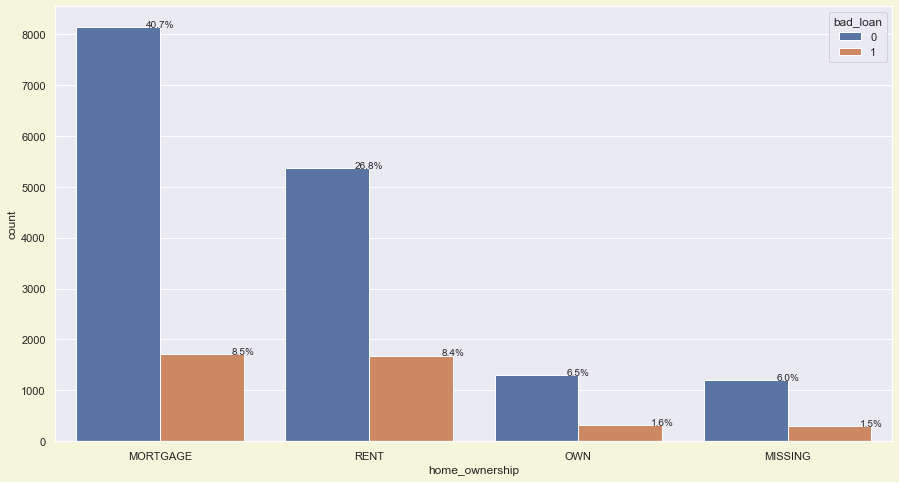

In [43]:
plt.figure(figsize=(15,8))
total = float(len(df))
ax = sns.countplot(x="home_ownership", hue="bad_loan", data=df,order=df["home_ownership"].value_counts().index)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [44]:
#we can see that, mortgage are the highest loan availers as well as they have a very low number of 
#defaulters when compared with other. where as rent has the highest percentage of defaulters in that category.


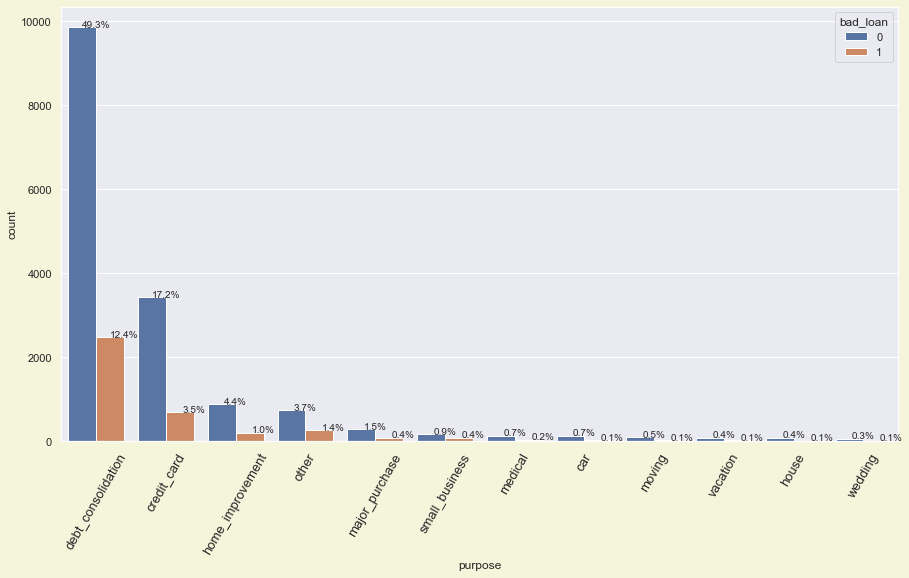

In [45]:
plt.figure(figsize=(15,8))
total = float(len(df))
ax = sns.countplot(x="purpose", hue="bad_loan", data=df,order=df["purpose"].value_counts().index)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    plt.xticks(rotation = 60,fontsize = 13)
plt.show()

In [46]:
#we can see that, debt consolidation & credit card are the highest loan availers.

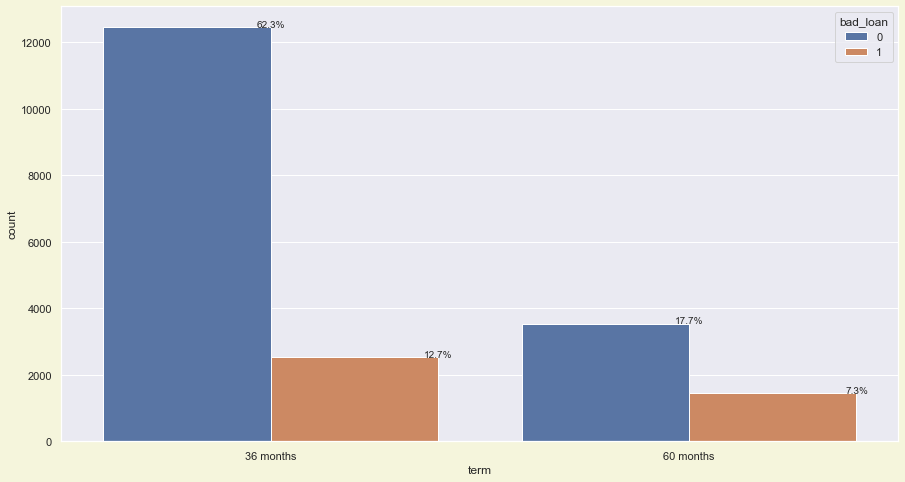

In [47]:
plt.figure(figsize=(15,8))
total = float(len(df))
ax = sns.countplot(x="term", hue="bad_loan", data=df,order=df["term"].value_counts().index)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [48]:
#from the term feature we could see that 36 month tenure is usually preferred by loan availers than 60 months tenure.

In [49]:
df.groupby(["home_ownership","grade","bad_loan"])["id"].count().to_frame().style.background_gradient("twilight")


In [50]:
#we could clearly see a trend, as the grade incerases the defaulters also increase and mortgage loan availers 
#tend to pay the loan back when compared with rent loan availers. 

#yet there are rent loan availers who pay back their loans also but in very minimal numbers. 
#even in that, we can see the trend in the grade feature.

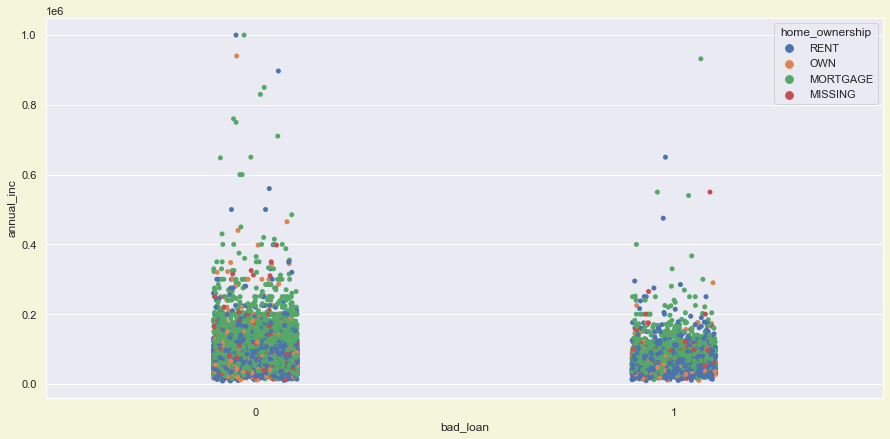

In [51]:
plt.figure(figsize=(15,7))
sns.stripplot(df["bad_loan"],df["annual_inc"],hue=df["home_ownership"])
plt.show()

In [52]:
#we can see that there are defaulters who has a higher annual income and lower annual income.

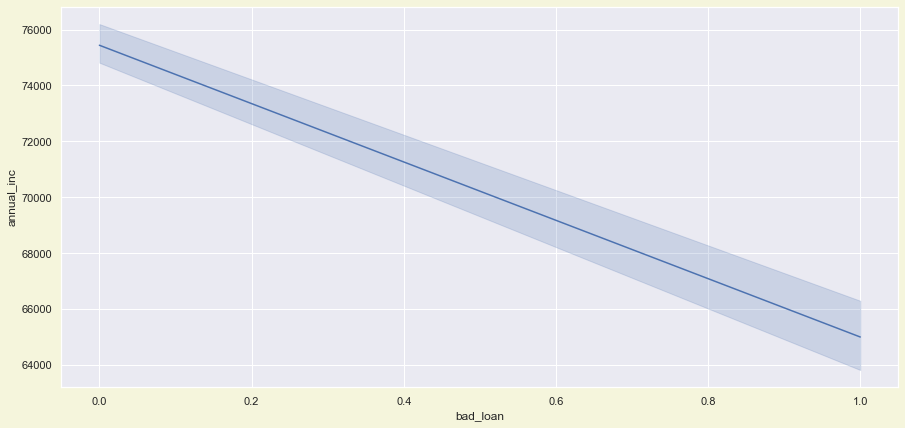

In [53]:
plt.figure(figsize=(15,7))
sns.lineplot(df["bad_loan"],df["annual_inc"])
plt.show()

In [54]:
#we can see a clear drop in annual inc for the defaulters and non defaulters with an avg drop of 10000 rupees.

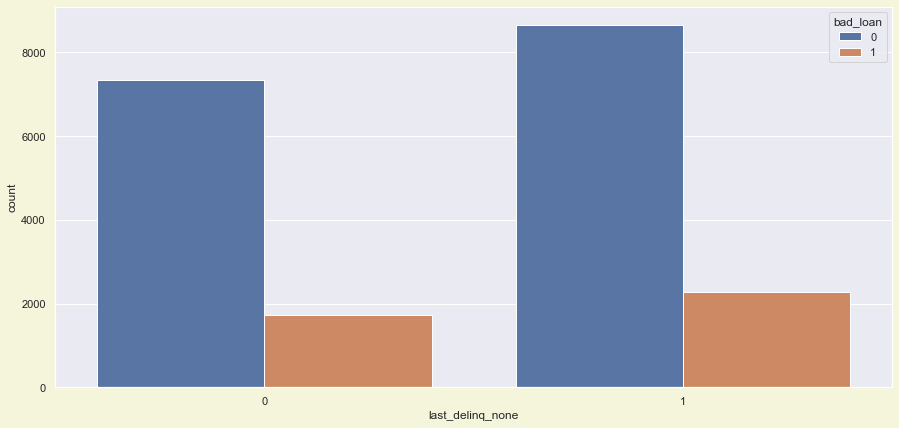

In [55]:
plt.figure(figsize=(15,7))
sns.countplot(df["last_delinq_none"],hue=df["bad_loan"])
plt.show()

In [56]:
pd.crosstab([df.last_delinq_none],[df.grade,df.bad_loan])

grade                A         B          C          D         E         F  \
bad_loan             0   1     0    1     0    1     0    1    0    1    0   
last_delinq_none                                                             
0                  624  48  2395  309  2118  506  1320  412  565  258  266   
1                 1411  76  2880  458  2276  666  1255  567  538  284  248   

grade                   G      
bad_loan            1   0   1  
last_delinq_none               
0                 168  52  27  
1                 183  52  38

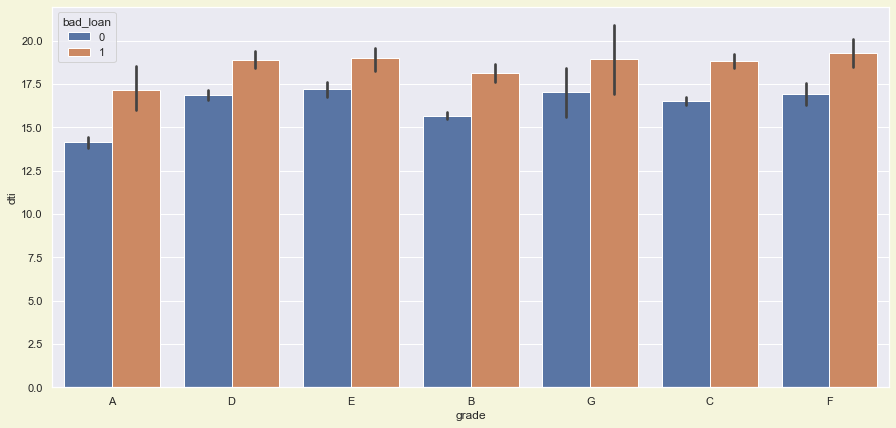

In [57]:
plt.figure(figsize=(15,7))
sns.barplot(df["grade"],df["dti"],hue=df["bad_loan"])
plt.show()

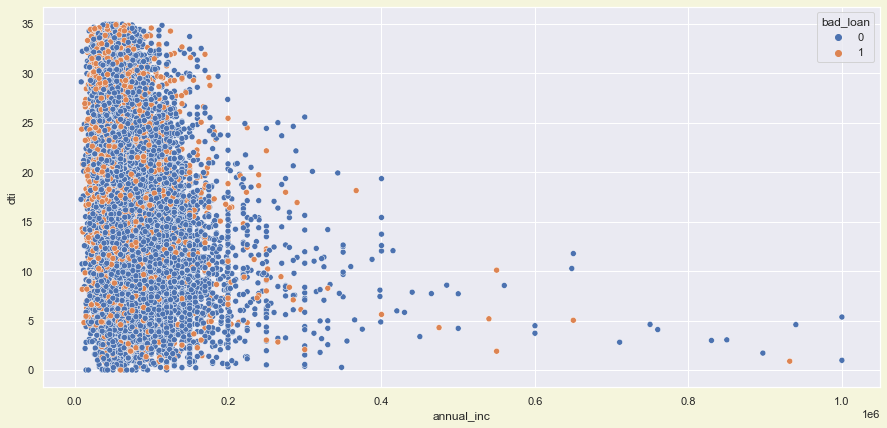

In [58]:
plt.figure(figsize=(15,7))
sns.scatterplot(df["annual_inc"],df["dti"],hue=df["bad_loan"])
plt.show()

### FEATURE ENGINEEING 

In [59]:
df["dti"].describe()

count   20000.000000
mean       16.585502
std         7.557208
min         0.000000
25%        10.900000
50%        16.200000
75%        22.010000
max        34.990000
Name: dti, dtype: float64

In [60]:
df1=[]
for i in  df["dti"].values:
    if i<26:
        df1.append("good")
    else:
        df1.append("bad")


What Is a Good Debt-to-Income Ratio? As a general guideline, 43% is the highest DTI ratio a borrower can have and still get qualified for a mortgage. Ideally, lenders prefer a debt-to-income ratio lower than 36%, with no more than 26% of that debt going towards servicing a mortgage or rent payment.

In [61]:
df["dti_G/B"] = df1

In [62]:
pd.crosstab(df["dti_G/B"],df["bad_loan"],normalize=True).T*100

dti_G/B,bad,good
bad_loan,,
0,8.805000,71.195000
1,3.750000,16.250000


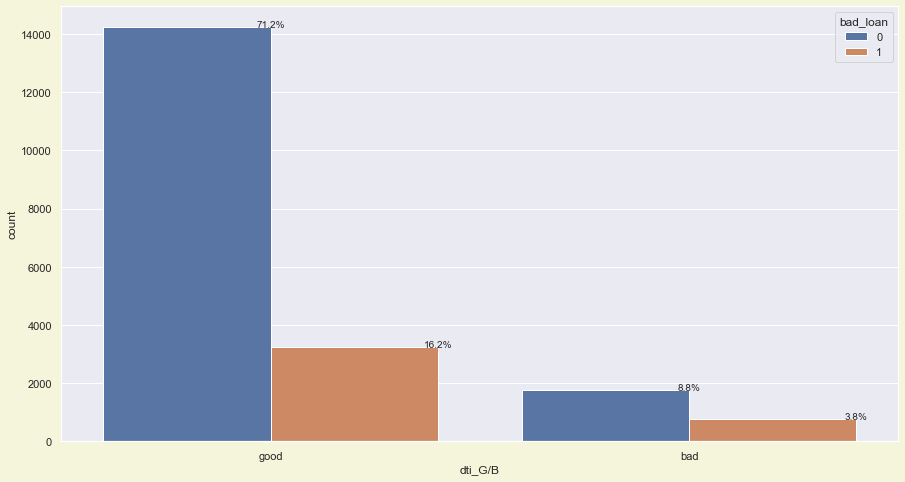

In [63]:
plt.figure(figsize=(15,8))
total = float(len(df))
ax = sns.countplot(x="dti_G/B", hue="bad_loan", data=df,order=df["dti_G/B"].value_counts().index)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

## INFERENCES 

In [64]:
#from the above analysis we can see that categorical variables such as, GRADE , HOME OWNERSHIP and TERM influence a lot
#in defaulters and non-defaulters,

#Grade B and C are highest loan availers and has comparatively lesser defaulters than other grade.

#we can see that, mortgage are the highest loan availers as well as they have a very low number of 
#defaulters when compared with other. where as rent has the highest percentage of defaulters in that category.

#from the term feature we could see that 36 month tenure is usually preferred by loan availers than 60 months tenure.

In [65]:
df["annual_inc"].describe()

count     20000.000000
mean      73349.578350
std       45198.567255
min        8412.000000
25%       47000.000000
50%       65000.000000
75%       88000.000000
max     1000000.000000
Name: annual_inc, dtype: float64

In [66]:
def feature_engg(x):
    if x <= 47000 :
        return "<47000"
    elif x >= 47001 and x <= 65000:
        return "47001 - 65000"
    elif x >= 65001 and x <= 88000 :
        return "65001 - 88000"
    else :
        return "> 88001"

In [67]:
df["FE_annual_inc"] = df["annual_inc"].map(feature_engg)

In [68]:
df["FE_annual_inc"].value_counts()

47001 - 65000    5507
<47000           5028
> 88001          4973
65001 - 88000    4492
Name: FE_annual_inc, dtype: int64

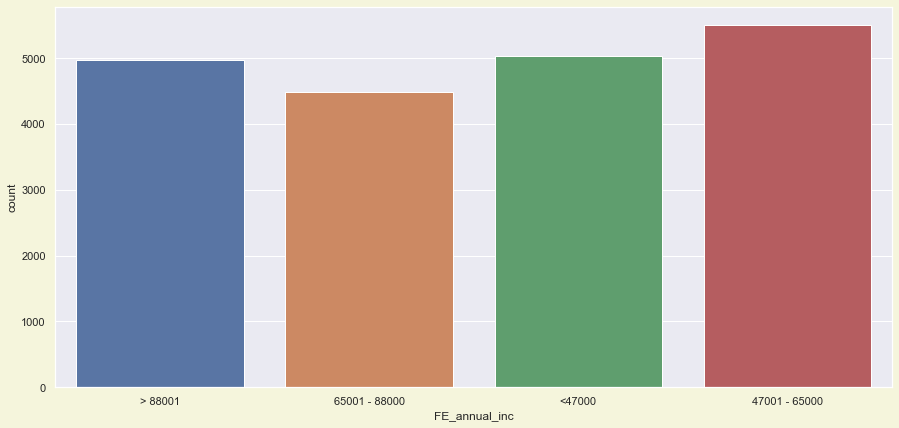

In [69]:
plt.figure(figsize=(15,7))
sns.countplot(df["FE_annual_inc"])
plt.show()

In [70]:
df.head()

,id,grade,annual_inc,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,dti_G/B,FE_annual_inc
0,11454641,A,100000,1,RENT,26.270000,credit_card,36 months,1,43.200000,0.000000,0.160624,0,bad,> 88001
1,9604874,A,83000,4,OWN,5.390000,credit_card,36 months,0,21.500000,0.000000,0.810777,0,good,65001 - 88000
2,9684700,D,78000,11,MORTGAGE,18.450000,debt_consolidation,60 months,1,46.300000,0.000000,0.035147,1,good,65001 - 88000
3,9695736,D,37536,6,MORTGAGE,12.280000,medical,60 months,0,10.700000,0.000000,0.534887,1,good,<47000
4,9795013,D,65000,11,MORTGAGE,11.260000,debt_consolidation,36 months,0,15.200000,0.000000,0.166500,0,good,47001 - 65000


In [71]:
#feature engineering for late fee variable.

l = []
for i in df["total_rec_late_fee"].values:
    if i <= 0:
        l.append(0)
    else:
        l.append(1)

df['Late Fee'] = l

In [72]:
df_num = df.select_dtypes(np.number)
df_num.head()

,id,annual_inc,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,Late Fee
0,11454641,100000,1,26.270000,1,43.200000,0.000000,0.160624,0,0
1,9604874,83000,4,5.390000,0,21.500000,0.000000,0.810777,0,0
2,9684700,78000,11,18.450000,1,46.300000,0.000000,0.035147,1,0
3,9695736,37536,6,12.280000,0,10.700000,0.000000,0.534887,1,0
4,9795013,65000,11,11.260000,0,15.200000,0.000000,0.166500,0,0


In [73]:
df.head()

,id,grade,annual_inc,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,dti_G/B,FE_annual_inc,Late Fee
0,11454641,A,100000,1,RENT,26.270000,credit_card,36 months,1,43.200000,0.000000,0.160624,0,bad,> 88001,0
1,9604874,A,83000,4,OWN,5.390000,credit_card,36 months,0,21.500000,0.000000,0.810777,0,good,65001 - 88000,0
2,9684700,D,78000,11,MORTGAGE,18.450000,debt_consolidation,60 months,1,46.300000,0.000000,0.035147,1,good,65001 - 88000,0
3,9695736,D,37536,6,MORTGAGE,12.280000,medical,60 months,0,10.700000,0.000000,0.534887,1,good,<47000,0
4,9795013,D,65000,11,MORTGAGE,11.260000,debt_consolidation,36 months,0,15.200000,0.000000,0.166500,0,good,47001 - 65000,0


## Encoding 

In [74]:
import  statsmodels.api  as ap

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [75]:
df_new=pd.DataFrame(index=df.index)
#odinal encoding as the data has linear incesing relation

od=OrdinalEncoder(categories=[["G","F","E","D","C","B","A"]])



df_new["grade"]=od.fit_transform(df[["grade"]])


In [76]:
df["purpose"].value_counts()

debt_consolidation    12337
credit_card            4137
home_improvement       1096
other                  1021
major_purchase          379
small_business          265
medical                 175
car                     168
moving                  123
vacation                112
house                   101
wedding                  86
Name: purpose, dtype: int64

In [77]:
#odinal encoding as the data has linear incesing relation


od=OrdinalEncoder(categories=[["debt_consolidation","credit_card","home_improvement","other","major_purchase",
                               "small_business","medical","car","moving","vacation","house","wedding"]])



df_new["purpose"]=od.fit_transform(df[["purpose"]])


In [78]:
#odinal encoding as the data has linear incesing relation

od=OrdinalEncoder(categories=[["OWN","RENT","MORTGAGE","MISSING"]])


df_new["home_ownership"]=od.fit_transform(df[["home_ownership"]])


In [79]:
#odinal encoding as the data has linear incesing relation


od=OrdinalEncoder(categories=[["<47000","47001 - 65000","65001 - 88000","> 88001"]])


df_new["FE_annual_inc"]=od.fit_transform(df[["FE_annual_inc"]])



In [80]:
df['term'].value_counts().index

Index(['36 months', '60 months'], dtype='object')

In [81]:
df['term'].replace({'36 Months':'36 months'},inplace=True)

In [82]:
#dummy encoding has only two catagory

df_new["term"]=pd.get_dummies(df["term"],drop_first=True)

df_new["dti_G/B"]=pd.get_dummies(df["dti_G/B"],drop_first=True)



In [83]:
df_num.head()

,id,annual_inc,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,Late Fee
0,11454641,100000,1,26.270000,1,43.200000,0.000000,0.160624,0,0
1,9604874,83000,4,5.390000,0,21.500000,0.000000,0.810777,0,0
2,9684700,78000,11,18.450000,1,46.300000,0.000000,0.035147,1,0
3,9695736,37536,6,12.280000,0,10.700000,0.000000,0.534887,1,0
4,9795013,65000,11,11.260000,0,15.200000,0.000000,0.166500,0,0


In [84]:
df.head()

,id,grade,annual_inc,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,dti_G/B,FE_annual_inc,Late Fee
0,11454641,A,100000,1,RENT,26.270000,credit_card,36 months,1,43.200000,0.000000,0.160624,0,bad,> 88001,0
1,9604874,A,83000,4,OWN,5.390000,credit_card,36 months,0,21.500000,0.000000,0.810777,0,good,65001 - 88000,0
2,9684700,D,78000,11,MORTGAGE,18.450000,debt_consolidation,60 months,1,46.300000,0.000000,0.035147,1,good,65001 - 88000,0
3,9695736,D,37536,6,MORTGAGE,12.280000,medical,60 months,0,10.700000,0.000000,0.534887,1,good,<47000,0
4,9795013,D,65000,11,MORTGAGE,11.260000,debt_consolidation,36 months,0,15.200000,0.000000,0.166500,0,good,47001 - 65000,0


In [85]:
df['dti'].isnull().sum()

0

In [86]:
dff = df.drop(["id","annual_inc","dti","total_rec_late_fee"],axis=1)
dff.head()

,grade,emp_length_num,home_ownership,purpose,term,last_delinq_none,revol_util,od_ratio,bad_loan,dti_G/B,FE_annual_inc,Late Fee
0,A,1,RENT,credit_card,36 months,1,43.200000,0.160624,0,bad,> 88001,0
1,A,4,OWN,credit_card,36 months,0,21.500000,0.810777,0,good,65001 - 88000,0
2,D,11,MORTGAGE,debt_consolidation,60 months,1,46.300000,0.035147,1,good,65001 - 88000,0
3,D,6,MORTGAGE,medical,60 months,0,10.700000,0.534887,1,good,<47000,0
4,D,11,MORTGAGE,debt_consolidation,36 months,0,15.200000,0.166500,0,good,47001 - 65000,0


In [87]:
dff.dtypes

grade                object
emp_length_num        int64
home_ownership       object
purpose              object
term                 object
last_delinq_none      int64
revol_util          float64
od_ratio            float64
bad_loan              int64
dti_G/B              object
FE_annual_inc        object
Late Fee              int64
dtype: object

In [88]:
df_final=pd.DataFrame()

df_final=pd.concat([df_num,df_new],axis=1)

In [89]:
df_final.head()

,id,annual_inc,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,Late Fee,grade,purpose,home_ownership,FE_annual_inc,term,dti_G/B
0,11454641,100000,1,26.270000,1,43.200000,0.000000,0.160624,0,0,6.000000,1.000000,1.000000,3.000000,0,0
1,9604874,83000,4,5.390000,0,21.500000,0.000000,0.810777,0,0,6.000000,1.000000,0.000000,2.000000,0,1
2,9684700,78000,11,18.450000,1,46.300000,0.000000,0.035147,1,0,3.000000,0.000000,2.000000,2.000000,1,1
3,9695736,37536,6,12.280000,0,10.700000,0.000000,0.534887,1,0,3.000000,6.000000,2.000000,0.000000,1,1
4,9795013,65000,11,11.260000,0,15.200000,0.000000,0.166500,0,0,3.000000,0.000000,2.000000,1.000000,0,1


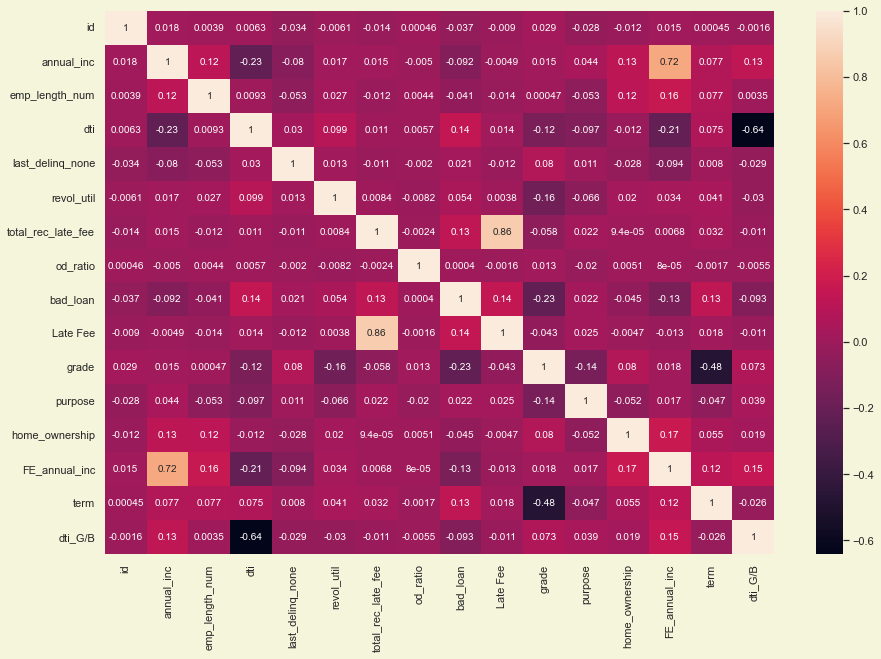

In [90]:
plt.figure(figsize=(15,10))
sns.heatmap(df_final.corr(),annot=True)
plt.show()

In [91]:
df_final.drop(["id","annual_inc","dti","bad_loan","total_rec_late_fee"],axis=1,inplace=True)

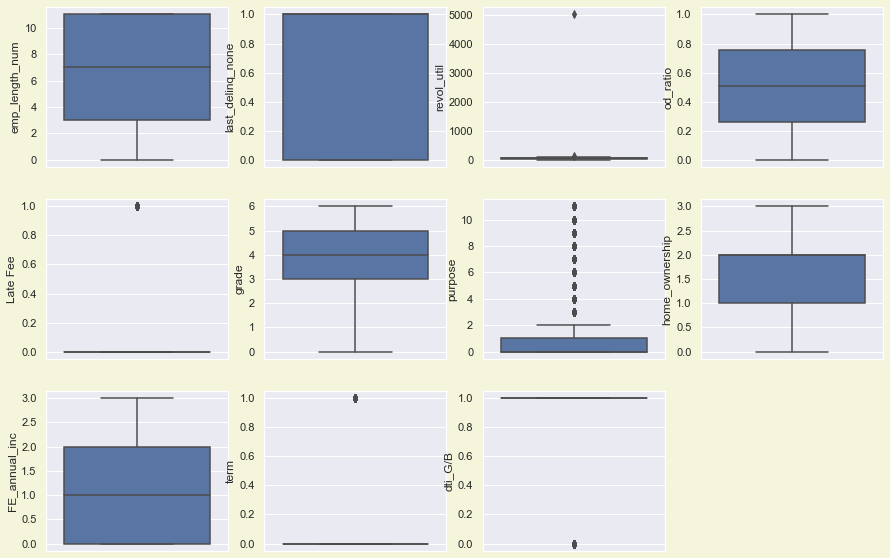

In [92]:
plt.subplots(figsize=(15,10))
for i,c in enumerate(df_final,1):
    plt.subplot(3,4,i)
    sns.boxplot(y = df_final[c])

In [93]:
df_final.head()

,emp_length_num,last_delinq_none,revol_util,od_ratio,Late Fee,grade,purpose,home_ownership,FE_annual_inc,term,dti_G/B
0,1,1,43.200000,0.160624,0,6.000000,1.000000,1.000000,3.000000,0,0
1,4,0,21.500000,0.810777,0,6.000000,1.000000,0.000000,2.000000,0,1
2,11,1,46.300000,0.035147,0,3.000000,0.000000,2.000000,2.000000,1,1
3,6,0,10.700000,0.534887,0,3.000000,6.000000,2.000000,0.000000,1,1
4,11,0,15.200000,0.166500,0,3.000000,0.000000,2.000000,1.000000,0,1


In [94]:
df_final.skew()

emp_length_num     -0.279670
last_delinq_none   -0.187229
revol_util         81.333264
od_ratio           -0.020522
Late Fee            9.143539
grade              -0.615663
purpose             3.016905
home_ownership     -0.251965
FE_annual_inc       0.068014
term                1.155095
dti_G/B            -2.260375
dtype: float64

In [95]:
df_final.revol_util.nunique()

1030

## MODEL BUILDING

In [399]:
import  statsmodels.api  as ap

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [400]:
x=df_final

y=df["bad_loan"]

ss=StandardScaler()

xs = pd.DataFrame(ss.fit_transform(x), columns = x.columns, index = x.index)

In [401]:
xc = sm.add_constant(xs)

In [402]:
x_train,x_test,y_train,y_test=train_test_split(xc,y,train_size=0.8, stratify=y, random_state=0)


In [403]:
modelf = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.454271
         Iterations 6


In [404]:
modelf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               bad_loan   No. Observations:                16000
Model:                          Logit   Df Residuals:                    15988
Method:                           MLE   Df Model:                           11
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                 0.09219
Time:                        23:19:14   Log-Likelihood:                -7268.3
converged:                       True   LL-Null:                       -8006.4
Covariance Type:            nonrobust   LLR p-value:                4.305e-310
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.5470      0.022    -68.816      0.000      -1.591      -1.503
emp_length_num      -0.0592      0.021     -2.791      0.005      -0.101      -0.018
last_delinq_none     0.0417      0.021      1.967      0.049       0.000       0.083
revol_util           0.2757      0.041      6.772      0.000       0.196       0.355
od_ratio             0.0028      0.021      0.134      0.893      -0.038       0.044
Late Fee             0.2481      0.018     13.741      0.000       0.213       0.283
grade               -0.4460      0.025    -17.783      0.000      -0.495      -0.397
purpose              0.0128      0.021      0.625      0.532      -0.027       0.053
home_ownership      -0.0301      0.021     -1.423      0.155      -0.072       0.011
FE_annual_inc       -0.3563      0.023    -15.644      0.000      -0.401      -0.312
term                 0.1658      0.023      7.219      0.000       0.121       0.211
dti_G/B             -0.1162      0.019     -6.111      0.000      -0.153      -0.079
====================================================================================
"""

In [405]:
np.exp(modelf.params)

const              0.212879
emp_length_num     0.942513
last_delinq_none   1.042566
revol_util         1.317443
od_ratio           1.002809
Late Fee           1.281543
grade              0.640174
purpose            1.012923
home_ownership     0.970350
FE_annual_inc      0.700296
term               1.180376
dti_G/B            0.890295
dtype: float64

In [413]:
odds = pd.DataFrame({"ODDS":np.exp(modelf.params)},index = np.exp(modelf.params).index)
odds

,ODDS
const,0.212879
emp_length_num,0.942513
last_delinq_none,1.042566
revol_util,1.317443
od_ratio,1.002809
Late Fee,1.281543
grade,0.640174
purpose,1.012923
home_ownership,0.970350
FE_annual_inc,0.700296


In [414]:
for i,j in zip(odds.index,odds['ODDS']):
    print('For a unit increase in',i,'the log-likelihood increase by',j)

For a unit increase in const the log-likelihood increase by 0.21287864093541958
For a unit increase in emp_length_num the log-likelihood increase by 0.9425130333382836
For a unit increase in last_delinq_none the log-likelihood increase by 1.0425659377888727
For a unit increase in revol_util the log-likelihood increase by 1.3174427242200955
For a unit increase in od_ratio the log-likelihood increase by 1.0028087179502445
For a unit increase in Late Fee the log-likelihood increase by 1.281543343701322
For a unit increase in grade the log-likelihood increase by 0.6401739298736085
For a unit increase in purpose the log-likelihood increase by 1.012923445350622
For a unit increase in home_ownership the log-likelihood increase by 0.9703501694772382
For a unit increase in FE_annual_inc the log-likelihood increase by 0.7002964074564655
For a unit increase in term the log-likelihood increase by 1.180376328027806
For a unit increase in dti_G/B the log-likelihood increase by 0.8902946398969791


In [407]:
y_pred_prob = modelf.predict(x_test)

In [408]:
y_pred = [0 if x<0.5 else 1 for x in y_pred_prob]

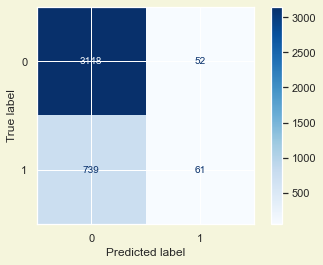

In [409]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="Blues");

In [105]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      3200
           1       0.54      0.08      0.13       800

    accuracy                           0.80      4000
   macro avg       0.67      0.53      0.51      4000
weighted avg       0.76      0.80      0.74      4000



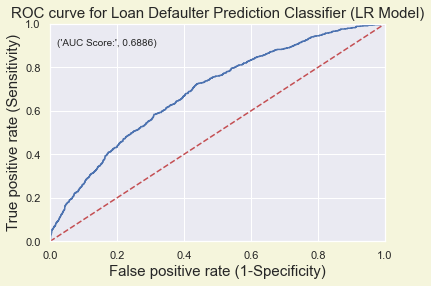

In [410]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Loan Defaulter Prediction Classifier (LR Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

* The model is built using logistic regression. The model gives an accuracy of 80%. But,we can see the prection of loan defaulters is poor as the recall score is 0.09. Also, thr ROC_AUC score is of the model 0.53 which is low. As per the business problem, the FN will cost more to the business compared to FP. So, lets build another model and see if the recall score and ROC_AUC score improves compared to the current model.

In [339]:
score_card = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score',
                                   'Accuracy Score', 'Kappa Score', 'f1-score','ROC-AUC score'])

def update_score_card(model, model_name,x_test,y_test):
    if model_name =="LR_model(Base)":
        y_pred_prob = model.predict(x_test)
        y_pred = [0 if x<0.5 else 1 for x in y_pred_prob]
    else:
        y_pred = model.predict(x_test)
        y_pred_prob = model.predict_proba(x_test)[:,1]
    global score_card
    score_card = score_card.append({'Model': model_name,
                                    'Precision Score': metrics.precision_score(y_test, y_pred, average='macro'),
                                    'Recall Score': metrics.recall_score(y_test, y_pred, average='macro'),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred, average='macro'),
                                   'ROC-AUC score':metrics.roc_auc_score(y_test,y_pred_prob)},
                                    ignore_index = True)

In [340]:
update_score_card(modelf,"LR_model(Base)",x_test,y_test)

In [341]:
score_card

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,ROC-AUC score
0,LR_model(Base),0.674851,0.530000,0.802250,0.088500,0.511006,0.688634


### Decision tree base model .

In [342]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()


xtrain, xtest, ytrain , ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [343]:
dtm = dt.fit(xtrain, ytrain)


In [344]:
y_predt = dtm.predict(xtest)

In [196]:
y_predt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [193]:
y_predt_proba = dtm.predict_proba(xtest)

In [202]:
print(metrics.classification_report(ytest, y_predt))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      3180
           1       0.28      0.29      0.28       820

    accuracy                           0.70      4000
   macro avg       0.55      0.55      0.55      4000
weighted avg       0.70      0.70      0.70      4000



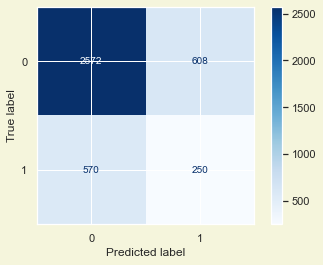

In [112]:
metrics.ConfusionMatrixDisplay.from_predictions(ytest, y_predt,cmap="Blues");

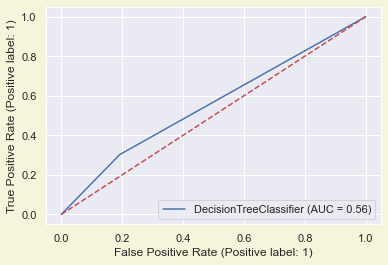

In [345]:
metrics.plot_roc_curve(dtm,xtest,ytest)
plt.plot([0,1],[0,1],'r--')
plt.show()

* The model is built using Decision Tree Classifier. This model gives an accuracy of 70%. Though the overall accuracy has decreased, we can see the prediction of loan defaulters has been improved considerably as the recall score is 0.30. Also there is slight improvement in the ROC_AUC score. Though the model predicts better for the business problem, we'll still improve the prediction accuracy using advanced model building and boosting techniques. 

In [346]:
update_score_card(dtm,"Decision tree",xtest,ytest)

In [347]:
score_card

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,ROC-AUC score
0,LR_model(Base),0.674851,0.530000,0.802250,0.088500,0.511006,0.688634
1,Decision tree,0.553497,0.555308,0.704500,0.108745,0.554312,0.555308


### Random forest  

In [114]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [348]:
x=df_final

y=df["bad_loan"]


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=15,stratify=y)


rf= RandomForestClassifier(max_depth = 20,random_state=10)


rf_model =rf.fit(X_train,y_train)

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      3200
           1       0.50      0.11      0.18       800

    accuracy                           0.80      4000
   macro avg       0.66      0.54      0.53      4000
weighted avg       0.75      0.80      0.74      4000



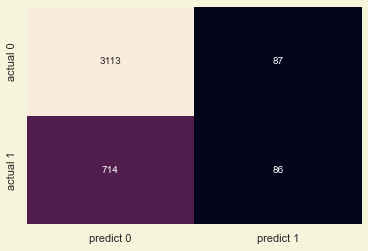

In [116]:
print(classification_report(y_test,rf_model.predict(X_test)))

cm=confusion_matrix(y_test,rf_model.predict(X_test))

cm_df=pd.DataFrame(cm,columns=["predict 0","predict 1"],index=["actual 0","actual 1"]) 

sns.heatmap(cm_df,fmt="d",annot=True,cbar=False);

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12800
           1       1.00      0.91      0.95      3200

    accuracy                           0.98     16000
   macro avg       0.99      0.95      0.97     16000
weighted avg       0.98      0.98      0.98     16000



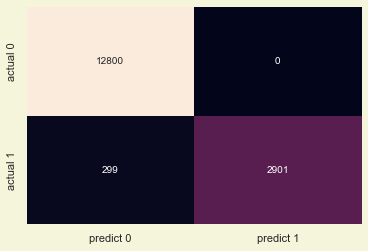

In [117]:
print(classification_report(y_train,rf_model.predict(X_train)))

cm=confusion_matrix(y_train,rf_model.predict(X_train))

cm_df=pd.DataFrame(cm,columns=["predict 0","predict 1"],index=["actual 0","actual 1"]) 

sns.heatmap(cm_df,fmt="d",annot=True,cbar=False);

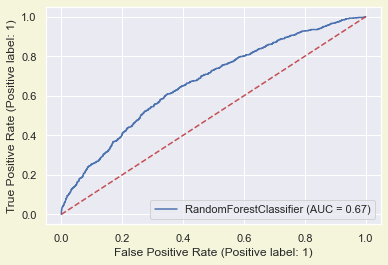

In [349]:
metrics.plot_roc_curve(rf_model,X_test,y_test)
plt.plot([0,1],[0,1],'r--')
plt.show()

* The model is built using Random Forest Classifier. This model gives an ROC-AUC Score of 66%. we can see the prediction of loan defaulters has been predicted very similar to the LR base model,  as the recall score is 54%. Also there is improvement in the accuracy score when compared with decision tree model. The model is overfitting for the training data,as the training recall is higher when compared to the test recall. 

In [350]:
update_score_card(rf_model,"Random forest",X_test,y_test)

In [351]:
score_card

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,ROC-AUC score
0,LR_model(Base),0.674851,0.530000,0.802250,0.088500,0.511006,0.688634
1,Decision tree,0.553497,0.555308,0.704500,0.108745,0.554312,0.555308
2,Random forest,0.655270,0.540156,0.799750,0.113742,0.531392,0.668068


### Random forest gridsearch

In [258]:
tuned_pramets={"criterion" : ['entropy', 'gini'],
"n_estimators" :[20, 30, 10, 40],
"max_depth" : [10, 15, 20],
"min_samples_split" : [2, 5, 8],
"min_samples_leaf":[5,7,8]
 }

In [352]:
x=df_final

y=df["bad_loan"]


X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=15,stratify=y)

In [260]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=15,stratify=y)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 11), (4000, 11), (16000,), (4000,))

In [128]:
ran_for= RandomForestClassifier(random_state=10,oob_score=10,class_weight="balanced")

rf_grid=GridSearchCV(estimator=ran_for,param_grid=tuned_pramets,cv=5)


rf_grid_model =rf_grid.fit(X_train,y_train)


In [129]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 40}

In [353]:
ran_for_tuned=RandomForestClassifier(criterion="entropy",max_depth=20,min_samples_split=2,n_estimators=40,
                                     min_samples_leaf=5,max_features='sqrt',random_state=10,class_weight="balanced")

In [354]:
ran_for_tuned=ran_for_tuned.fit(X_train,y_train)

y_test_pred=ran_for_tuned.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3200
           1       0.37      0.41      0.39       800

    accuracy                           0.74      4000
   macro avg       0.61      0.62      0.61      4000
weighted avg       0.75      0.74      0.75      4000



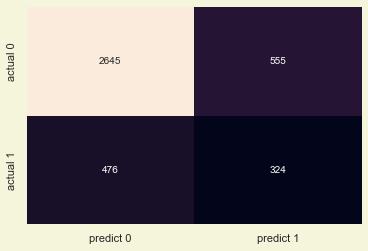

In [355]:
print(classification_report(y_test,y_test_pred))

cm=confusion_matrix(y_test,y_test_pred)

cm_df=pd.DataFrame(cm,columns=["predict 0","predict 1"],index=["actual 0","actual 1"]) 

sns.heatmap(cm_df,fmt="d",annot=True,cbar=False);

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     12800
           1       0.68      0.81      0.74      3200

    accuracy                           0.89     16000
   macro avg       0.82      0.86      0.83     16000
weighted avg       0.90      0.89      0.89     16000



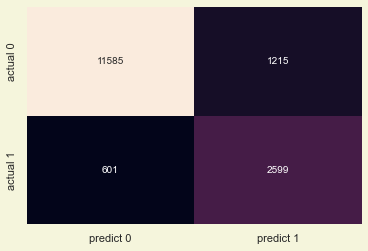

In [308]:
print(classification_report(y_train,ran_for_tuned.predict(X_train)))

cm=confusion_matrix(y_train,ran_for_tuned.predict(X_train))

cm_df=pd.DataFrame(cm,columns=["predict 0","predict 1"],index=["actual 0","actual 1"]) 

sns.heatmap(cm_df,fmt="d",annot=True,cbar=False);

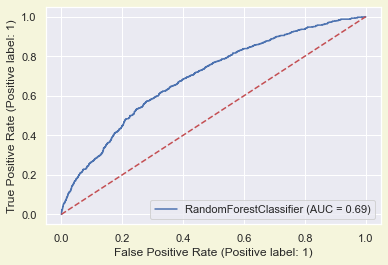

In [356]:
metrics.plot_roc_curve(ran_for_tuned,X_test,y_test)
plt.plot([0,1],[0,1],'r--')
plt.show()

* The model is built using Random Forest Classifier, the hyper parameters are tuned using Grid search CV and the best params are used to build the model. The model gives an ROC-AUC Score of 69% and the prediction of loan defaulters has also been increased from the previous model, as the recall score increased from 54% to 61%.The model is overfitting for the training data,as the training recall is higher when compared to the test recall.

In [357]:
update_score_card(ran_for_tuned,"Random forest-grid_search",X_test,y_test)

In [358]:
score_card

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,ROC-AUC score
0,LR_model(Base),0.674851,0.530000,0.802250,0.088500,0.511006,0.688634
1,Decision tree,0.553497,0.555308,0.704500,0.108745,0.554312,0.555308
2,Random forest,0.655270,0.540156,0.799750,0.113742,0.531392,0.668068
3,Random forest-grid_search,0.608043,0.615781,0.742250,0.223294,0.611418,0.693294


#### RandomizedSearchCV

In [430]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV

In [135]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=10,class_weight="balanced"))

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "randomforestclassifier__n_estimators": [10,15,25,30,35,40,50,100],
    "randomforestclassifier__min_samples_leaf": [10,15,7,4,5,20,25,30,40],
    "randomforestclassifier__max_features": [np.arange(0.3, 0.9, 0.1),'sqrt','log2'],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'randomforestclassifier__n_estimators': 25, 'randomforestclassifier__min_samples_leaf': 40, 'randomforestclassifier__max_features': 'log2'} with CV score=0.6278125:


              precision    recall  f1-score   support

           0       0.88      0.67      0.76      3200
           1       0.32      0.64      0.43       800

    accuracy                           0.66      4000
   macro avg       0.60      0.65      0.59      4000
weighted avg       0.77      0.66      0.69      4000



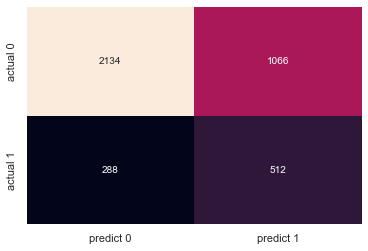

In [431]:
x=df_final

y=df["bad_loan"]


X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=15,stratify=y)


ran_rs_tuned=RandomForestClassifier(criterion="entropy",max_depth=20,min_samples_split=2,n_estimators=25,
                                     min_samples_leaf=40,max_features='log2',random_state=10,class_weight="balanced")

ran_rs_tuned=ran_rs_tuned.fit(X_train,y_train)

y_test_pred=ran_rs_tuned.predict(X_test)

print(classification_report(y_test,y_test_pred))

cm=confusion_matrix(y_test,y_test_pred)

cm_df=pd.DataFrame(cm,columns=["predict 0","predict 1"],index=["actual 0","actual 1"]) 

sns.heatmap(cm_df,fmt="d",annot=True,cbar=False);

              precision    recall  f1-score   support

           0       0.90      0.68      0.78     12800
           1       0.35      0.69      0.47      3200

    accuracy                           0.69     16000
   macro avg       0.63      0.69      0.62     16000
weighted avg       0.79      0.69      0.72     16000



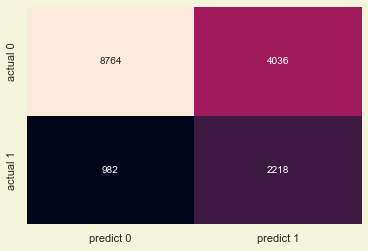

In [246]:
print(classification_report(y_train,ran_rs_tuned.predict(X_train)))

cm=confusion_matrix(y_train,ran_rs_tuned.predict(X_train))

cm_df=pd.DataFrame(cm,columns=["predict 0","predict 1"],index=["actual 0","actual 1"]) 

sns.heatmap(cm_df,fmt="d",annot=True,cbar=False);

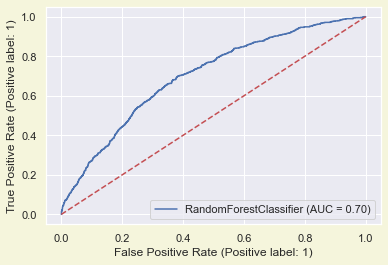

In [360]:
metrics.plot_roc_curve(ran_rs_tuned,X_test,y_test)
plt.plot([0,1],[0,1],'r--')
plt.show()

* The model is built using Random Forest Classifier, the hyper parameters are tuned using Randomized search CV and the best params are used to build the model. The model gives an ROC-AUC Score of 70% and the prediction of loan defaulters has also been increased from the previous model, as the recall score increased from 61% to 65%.The model isn't overfitting ,as the training and test recall is consistent.

In [362]:
update_score_card(ran_rs_tuned,"Random forest-randomsied_search",X_test,y_test)

In [367]:
score_card

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,ROC-AUC score
0,LR_model(Base),0.674851,0.530000,0.802250,0.088500,0.511006,0.688634
1,Decision tree,0.553497,0.555308,0.704500,0.108745,0.554312,0.555308
2,Random forest,0.655270,0.540156,0.799750,0.113742,0.531392,0.668068
3,Random forest-grid_search,0.608043,0.615781,0.742250,0.223294,0.611418,0.693294
4,Random forest-randomsied_search,0.602776,0.653438,0.661500,0.224868,0.594887,0.700619


In [433]:
rf_rs= pd.DataFrame({'Features':ran_rs_tuned.feature_importances_},index=X_train.columns)
rf_rs.sort_values('Features',ascending=False)

,Features
grade,0.244382
revol_util,0.165147
FE_annual_inc,0.136107
od_ratio,0.112813
term,0.094414
emp_length_num,0.064597
Late Fee,0.053746
home_ownership,0.038499
dti_G/B,0.035696
purpose,0.032296


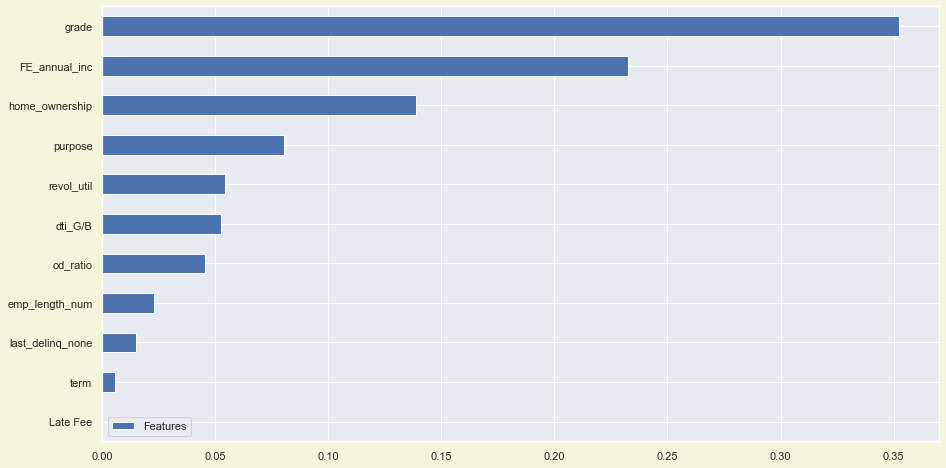

In [157]:
plt.rcParams['figure.figsize']=(15,8)
rf_rs.sort_values('Features',ascending=True).plot(kind='barh')
plt.show()

The above plot represents the feature importance of the Random forest model.

* The Grade, Fe_annual_income & Home ownership are the highly influencing attributes to the target variable. 
* This also matches with the descriptive analysis made in the EDA. 
* These parameters highly impact the prediction of defaulters.



## Naive_bayes

In [370]:
import warnings
warnings.filterwarnings('ignore')


x=df_final

y=df["bad_loan"]



ss=StandardScaler()

xs = pd.DataFrame(ss.fit_transform(x), columns = x.columns, index = x.index)


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB


Xtrain, Xtest, ytrain, ytest = train_test_split(xs, y, test_size= .20,random_state=20)



gb = GaussianNB()
gb.fit(Xtrain,ytrain)
print("Training Accuracy")
print(gb.score(Xtrain,ytrain))
print("Testing Accuracy")
print(gb.score(Xtest,ytest))
predicted = gb.predict(Xtest)
print(confusion_matrix(ytest,predicted))
print(classification_report(ytest,predicted))

scoresdt = cross_val_score(gb,Xtrain,ytrain,cv=10,scoring='recall')
print(scoresdt)
print("Average recall")
print(np.mean(scoresdt))

Training Accuracy
0.796875
Testing Accuracy
0.7825
[[2999  152]
 [ 718  131]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      3151
           1       0.46      0.15      0.23       849

    accuracy                           0.78      4000
   macro avg       0.63      0.55      0.55      4000
weighted avg       0.73      0.78      0.74      4000

[0.15873016 0.12063492 0.14285714 0.21904762 0.21269841 0.14920635
 0.2        0.15873016 0.13333333 0.16772152]
Average recall
0.16629596142254371


              precision    recall  f1-score   support

           0       0.82      0.95      0.88     12849
           1       0.46      0.17      0.24      3151

    accuracy                           0.80     16000
   macro avg       0.64      0.56      0.56     16000
weighted avg       0.75      0.80      0.76     16000



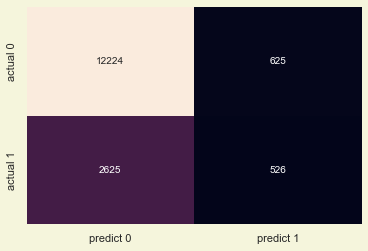

In [147]:
print(classification_report(ytrain,gb.predict(Xtrain)))

cm=confusion_matrix(ytrain,gb.predict(Xtrain))

cm_df=pd.DataFrame(cm,columns=["predict 0","predict 1"],index=["actual 0","actual 1"]) 

sns.heatmap(cm_df,fmt="d",annot=True,cbar=False);

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      3151
           1       0.46      0.15      0.23       849

    accuracy                           0.78      4000
   macro avg       0.63      0.55      0.55      4000
weighted avg       0.73      0.78      0.74      4000



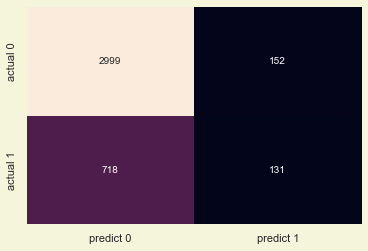

In [107]:
print(classification_report(ytest,gb.predict(Xtest)))

cm=confusion_matrix(ytest,gb.predict(Xtest))

cm_df=pd.DataFrame(cm,columns=["predict 0","predict 1"],index=["actual 0","actual 1"]) 

sns.heatmap(cm_df,fmt="d",annot=True,cbar=False);

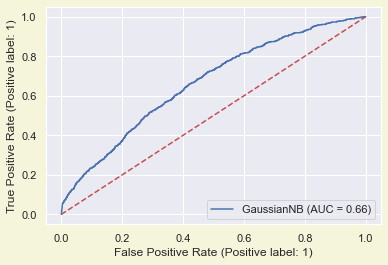

In [371]:
metrics.plot_roc_curve(gb,Xtest,ytest)
plt.plot([0,1],[0,1],'r--')
plt.show()

* The model is built using Naive Bayes Classifier, This model gives an ROC-AUC Score of 66%. we can see the prediction of loan defaulters has been predicted very similar to the LR and Decision tree model,  as the recall score is 55%. Also there is improvement in the accuracy score when compared with decision tree model. The model is overfitting for the training data,as the training recall is higher when compared to the test recall.

In [373]:
update_score_card(gb,"Naive_bayes",Xtest,ytest)

In [374]:
score_card

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,ROC-AUC score
0,LR_model(Base),0.674851,0.530000,0.802250,0.088500,0.511006,0.688634
1,Decision tree,0.553497,0.555308,0.704500,0.108745,0.554312,0.555308
2,Random forest,0.655270,0.540156,0.799750,0.113742,0.531392,0.668068
3,Random forest-grid_search,0.608043,0.615781,0.742250,0.223294,0.611418,0.693294
4,Random forest-randomsied_search,0.602776,0.653438,0.661500,0.224868,0.594887,0.700619
5,Naive_bayes,0.634865,0.553030,0.782500,0.140203,0.552387,0.663283


### xg boost 

In [375]:
import warnings
warnings.filterwarnings('ignore')


x=df_final

y=df["bad_loan"]


ss=StandardScaler()

xs = pd.DataFrame(ss.fit_transform(x), columns = x.columns, index = x.index)


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(xs, y, test_size= .20,random_state=10)

from sklearn.utils.class_weight import compute_sample_weight
xgb_classifier = XGBClassifier()
xgb=xgb_classifier.fit(Xtrain, ytrain)


print("Training Accuracy")
print(xgb.score(Xtrain,ytrain))
print("Testing Accuracy")
print(xgb.score(Xtest,ytest))

predicted = xgb.predict(Xtest)

print(confusion_matrix(ytest,predicted))

print(classification_report(ytest,predicted))

scoresdt = cross_val_score(xgb,Xtrain,ytrain,cv=10,scoring='recall')
print(scoresdt)

print("Average recall")
print(np.mean(scoresdt))

Training Accuracy
0.8624375
Testing Accuracy
0.7925
[[3070  126]
 [ 704  100]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      3196
           1       0.44      0.12      0.19       804

    accuracy                           0.79      4000
   macro avg       0.63      0.54      0.54      4000
weighted avg       0.74      0.79      0.74      4000

[0.12852665 0.13479624 0.14420063 0.13166144 0.1125     0.11875
 0.096875   0.09375    0.15       0.078125  ]
Average recall
0.11891849529780565


              precision    recall  f1-score   support

           0       0.86      0.99      0.92     12804
           1       0.94      0.33      0.49      3196

    accuracy                           0.86     16000
   macro avg       0.90      0.66      0.71     16000
weighted avg       0.87      0.86      0.83     16000



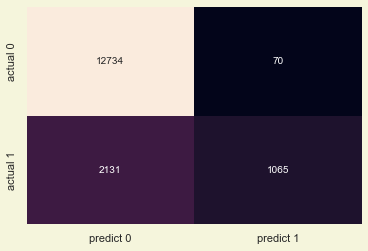

In [287]:
print(classification_report(ytrain,xgb.predict(Xtrain)))

cm=confusion_matrix(ytrain,xgb.predict(Xtrain))

cm_df=pd.DataFrame(cm,columns=["predict 0","predict 1"],index=["actual 0","actual 1"]) 

sns.heatmap(cm_df,fmt="d",annot=True,cbar=False);

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      3196
           1       0.44      0.12      0.19       804

    accuracy                           0.79      4000
   macro avg       0.63      0.54      0.54      4000
weighted avg       0.74      0.79      0.74      4000



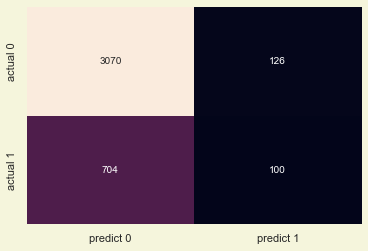

In [323]:
print(classification_report(ytest,xgb.predict(Xtest)))

cm=confusion_matrix(ytest,xgb.predict(Xtest))

cm_df=pd.DataFrame(cm,columns=["predict 0","predict 1"],index=["actual 0","actual 1"]) 

sns.heatmap(cm_df,fmt="d",annot=True,cbar=False);

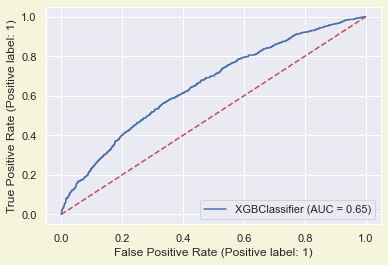

In [376]:
metrics.plot_roc_curve(xgb,Xtest,ytest)
plt.plot([0,1],[0,1],'r--')
plt.show()

* The model is built using XG Boost Classifier, This model gives an ROC-AUC Score of 65%. we can see the prediction of loan defaulters has been predicted very similar to the LR and Decision tree model,  as the recall score is 54%. Also there is improvement in the accuracy score when compared with decision tree model.  The model is overfitting for the training data,as the training recall is higher when compared to the test recall.

In [377]:
update_score_card(xgb,"xg boost",Xtest,ytest)

In [378]:
score_card

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,ROC-AUC score
0,LR_model(Base),0.674851,0.530000,0.802250,0.088500,0.511006,0.688634
1,Decision tree,0.553497,0.555308,0.704500,0.108745,0.554312,0.555308
2,Random forest,0.655270,0.540156,0.799750,0.113742,0.531392,0.668068
3,Random forest-grid_search,0.608043,0.615781,0.742250,0.223294,0.611418,0.693294
4,Random forest-randomsied_search,0.602776,0.653438,0.661500,0.224868,0.594887,0.700619
5,Naive_bayes,0.634865,0.553030,0.782500,0.140203,0.552387,0.663283
6,xg boost,0.627969,0.542477,0.792500,0.116220,0.537546,0.654105


### xg boost with Grid search

In [379]:
x=df_final

y=df["bad_loan"]


ss=StandardScaler()

xs = pd.DataFrame(ss.fit_transform(x), columns = x.columns, index = x.index)

Xtrain, Xtest, ytrain, ytest = train_test_split(xs, y, test_size= .20,random_state=10)

tuned_pramets={"learning_rate" : [0.0001,0.001,0.01,0.1,1],
"n_estimators" :[20, 30, 10, 40],
"max_depth" : [10, 15, 20],
"gamma":[0.1,0.2,0.5,0.7]
 }

xg= XGBClassifier()

xg_grid=GridSearchCV(estimator=xg,param_grid=tuned_pramets,cv=5)


xg_grid_model =xg_grid.fit(Xtrain,ytrain)
xg_grid_model.best_params_

{'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 30}

In [380]:
import warnings
warnings.filterwarnings('ignore')


x=df_final

y=df["bad_loan"]


ss=StandardScaler()

xs = pd.DataFrame(ss.fit_transform(x), columns = x.columns, index = x.index)


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(xs, y, test_size= .20,random_state=10)

from sklearn.utils.class_weight import compute_sample_weight
xgb_classifier = XGBClassifier(gamma = 0.2, learning_rate = 0.1,n_estimators=30,max_depth=10)
xg_gs = xgb_classifier.fit(Xtrain, ytrain)


print("Training Accuracy")
print(xg_gs.score(Xtrain,ytrain))
print("Testing Accuracy")
print(xg_gs.score(Xtest,ytest))

predicted = xg_gs.predict(Xtest)

print(confusion_matrix(ytest,predicted))

print(classification_report(ytest,predicted))

scoresdt = cross_val_score(xg_gs,Xtrain,ytrain,cv=10,scoring='recall')
print(scoresdt)

print("Average recall")
print(np.mean(scoresdt))

Training Accuracy
0.8420625
Testing Accuracy
0.79725
[[3131   65]
 [ 746   58]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      3196
           1       0.47      0.07      0.13       804

    accuracy                           0.80      4000
   macro avg       0.64      0.53      0.51      4000
weighted avg       0.74      0.80      0.73      4000

[0.09717868 0.09404389 0.0815047  0.09090909 0.084375   0.06875
 0.0625     0.10625    0.11875    0.065625  ]
Average recall
0.08698863636363638


              precision    recall  f1-score   support

           0       0.84      1.00      0.91     12804
           1       0.96      0.22      0.36      3196

    accuracy                           0.84     16000
   macro avg       0.90      0.61      0.63     16000
weighted avg       0.86      0.84      0.80     16000



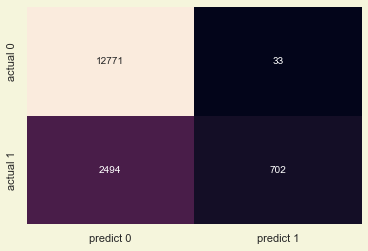

In [284]:
print(classification_report(ytrain,xg_gs.predict(Xtrain)))

cm=confusion_matrix(ytrain,xg_gs.predict(Xtrain))

cm_df=pd.DataFrame(cm,columns=["predict 0","predict 1"],index=["actual 0","actual 1"]) 

sns.heatmap(cm_df,fmt="d",annot=True,cbar=False);

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      3196
           1       0.47      0.07      0.13       804

    accuracy                           0.80      4000
   macro avg       0.64      0.53      0.51      4000
weighted avg       0.74      0.80      0.73      4000



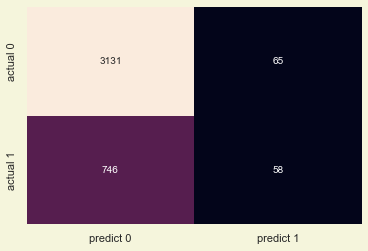

In [285]:
print(classification_report(ytest,xg_gs.predict(Xtest)))

cm=confusion_matrix(ytest,xg_gs.predict(Xtest))

cm_df=pd.DataFrame(cm,columns=["predict 0","predict 1"],index=["actual 0","actual 1"]) 

sns.heatmap(cm_df,fmt="d",annot=True,cbar=False);

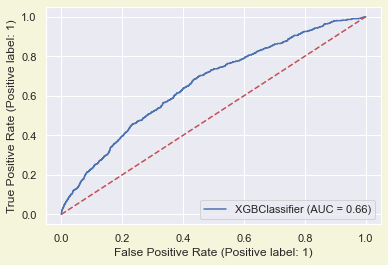

In [381]:
metrics.plot_roc_curve(xg_gs,Xtest,ytest)
plt.plot([0,1],[0,1],'r--')
plt.show()

* The model is built using XG Boost Classifier,the hyper parameters are tuned using Grid search CV and the best params are used to build the model. This model gives an ROC-AUC Score of 65%. we can see the prediction of loan defaulters has dropped when compared with the LR and Decision tree model,as the recall score is 52%. Also there is improvement in the accuracy score when compared with decision tree model. The model is overfitting for the training data,as the training recall is higher when compared to the test recall.

In [382]:
update_score_card(xg_gs,"xg boost-Grid_search",Xtest,ytest)

In [395]:
score_card

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,ROC-AUC score
0,LR_model(Base),0.674851,0.530000,0.802250,0.088500,0.511006,0.688634
1,Decision tree,0.553497,0.555308,0.704500,0.108745,0.554312,0.555308
2,Random forest,0.655270,0.540156,0.799750,0.113742,0.531392,0.668068
3,Random forest-grid_search,0.608043,0.615781,0.742250,0.223294,0.611418,0.693294
4,Random forest-randomsied_search,0.602776,0.653438,0.661500,0.224868,0.594887,0.700619
5,Naive_bayes,0.634865,0.553030,0.782500,0.140203,0.552387,0.663283
6,xg boost,0.627969,0.542477,0.792500,0.116220,0.537546,0.654105
7,xg boost-Grid_search,0.639564,0.525901,0.797250,0.075840,0.505237,0.658708


## smote

* Smote is used for over sampling the target variable as the data has an imblance. In real time scenario, smote is not recomended ,as the data consists of personal informations, so synthetically generating the personal information has no logical explanation.For time being, smote is used only for comparing with the other models. 

In [386]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy='minority')
x=df_final

y=df["bad_loan"]

X_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

0    16000
1    16000
Name: bad_loan, dtype: int64

In [387]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25600, 11), (6400, 11), (25600,), (6400,))

In [145]:
# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=10,class_weight="balanced"))

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "randomforestclassifier__n_estimators": [10,15,25,30,35,40,50,100],
    "randomforestclassifier__min_samples_leaf": [10,15,7,4,5,20,25,30,40],
    "randomforestclassifier__max_features": [np.arange(0.3, 0.9, 0.1),'sqrt','log2'],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__max_features': 'sqrt'} with CV score=0.7866406250000001:


              precision    recall  f1-score   support

           0       0.78      0.84      0.81      3200
           1       0.83      0.76      0.79      3200

    accuracy                           0.80      6400
   macro avg       0.80      0.80      0.80      6400
weighted avg       0.80      0.80      0.80      6400



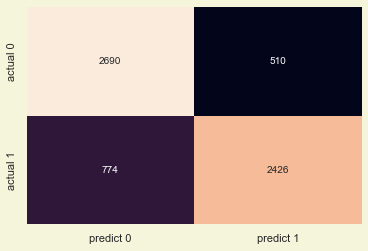

In [388]:
ran_rs_tuned=RandomForestClassifier(criterion="entropy",max_depth=20,min_samples_split=2,n_estimators=25,
                                     min_samples_leaf=40,max_features='log2',random_state=10,class_weight="balanced")

ran_rs_tuned=ran_rs_tuned.fit(X_train,y_train)

y_test_pred=ran_rs_tuned.predict(X_test)

print(classification_report(y_test,y_test_pred))

cm=confusion_matrix(y_test,y_test_pred)

cm_df=pd.DataFrame(cm,columns=["predict 0","predict 1"],index=["actual 0","actual 1"]) 

sns.heatmap(cm_df,fmt="d",annot=True,cbar=False);

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     12800
           1       0.85      0.77      0.81     12800

    accuracy                           0.82     25600
   macro avg       0.82      0.82      0.82     25600
weighted avg       0.82      0.82      0.82     25600



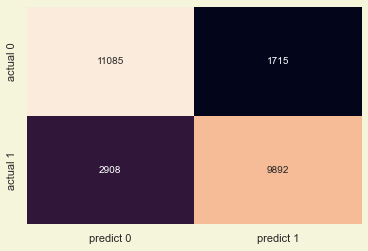

In [147]:
print(classification_report(y_train,ran_rs_tuned.predict(X_train)))

cm=confusion_matrix(y_train,ran_rs_tuned.predict(X_train))

cm_df=pd.DataFrame(cm,columns=["predict 0","predict 1"],index=["actual 0","actual 1"]) 

sns.heatmap(cm_df,fmt="d",annot=True,cbar=False);

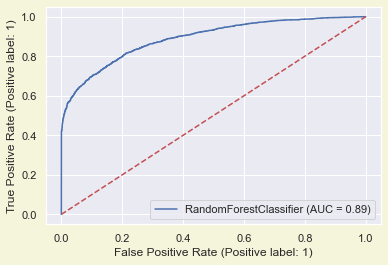

In [389]:
metrics.plot_roc_curve(ran_rs_tuned,X_test,y_test)
plt.plot([0,1],[0,1],'r--')
plt.show()

* The scoring parameters used in the table below are macro avg of each model test predictions.

In [397]:
score_card

,Model,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score,ROC-AUC score
0,LR_model(Base),0.674851,0.530000,0.802250,0.088500,0.511006,0.688634
1,Decision tree,0.553497,0.555308,0.704500,0.108745,0.554312,0.555308
2,Random forest,0.655270,0.540156,0.799750,0.113742,0.531392,0.668068
3,Random forest-grid_search,0.608043,0.615781,0.742250,0.223294,0.611418,0.693294
4,Random forest-randomsied_search,0.602776,0.653438,0.661500,0.224868,0.594887,0.700619
5,Naive_bayes,0.634865,0.553030,0.782500,0.140203,0.552387,0.663283
6,xg boost,0.627969,0.542477,0.792500,0.116220,0.537546,0.654105
7,xg boost-Grid_search,0.639564,0.525901,0.797250,0.075840,0.505237,0.658708


* The above table represents the performance comparison of various models built. The metrics used mainly to validate the model performance are Recall Score and ROC_AUC Score as there is imbalance in the data. From the results, we can conclude that the Random Forest model built on tuned hyper parameters using Randomized Search CV gave the highest Recall score of 0.66 with an ROC score of 0.70 among all the models built. We shall ascertain that Random Forest tuned using Randomized Search CV is the best fit model for our data predictions.